
### Spectrum クラスと EpochsSpectrum クラス: 周波数領域のデータ

このチュートリアルでは、`mne.io.Raw`、`mne.Epochs`、`mne.Evoked`データから周波数領域表現を作成し、視覚化する方法を紹介します。

いつものように、必要なモジュールをインポートし、`sample dataset <sample-dataset>` をロードすることから始めます：

In [1]:
import numpy as np

import mne

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = sample_data_folder / "MEG" / "sample" / "sample_audvis_raw.fif"
raw = mne.io.read_raw_fif(sample_data_raw_file, verbose=False).crop(tmax=60)

`mne.io.Raw`、`mne.Epochs`、`mne.Evoked`には、同じオプションを持つ`~mne.io.Raw.compute_psd` メソッドがあります。



In [2]:
raw.compute_psd()

Effective window size : 3.410 (s)


<Power Spectrum (from Raw, welch method) | 366 channels × 1025 freqs, 0.0-300.3 Hz>

**Effective window size : 3.410 (s)**

PSDを計算する際に使用されたFFTウィンドウの実効長（1セグメントあたりの時間長）。
これは n_fft / sfreq = 2048 / 600 により決まり、ここでは約3.41秒分のデータが1ウィンドウに使用されたという意味です。

|項目|説明|
|:-|:-|
|**Data type**|データの種類。ここでは「Power Spectrum（パワースペクトル密度）」を表し、信号のエネルギー分布を周波数ごとに示す。|
|**Units**|各チャンネルタイプにおけるPSDの単位：`eeg` → V²/Hz、`grad` → (T/m)²/Hz、`mag` → T²/Hz。物理的な意味を持つ単位で、信号の強度を表す。|
|**Data source**|PSDを算出した元のデータオブジェクト。ここでは `Raw` オブジェクト（連続生データ）。|
|**Dims**|出力データの次元。`channel, freq` は「チャンネル数 × 周波数ビン数」を意味する。|
|**Estimation method**|使用されたスペクトル推定法。ここでは `welch` 法が使われ、時間領域を区切って平均する安定した手法。|
|**Number of channels**|PSD計算に使用されたチャンネルの総数（例：EEG, MEG, EOGなど含む）。ここでは366チャンネル。|
|**Number of frequency bins**|周波数分解能。FFT後の正の周波数成分数（通常、`n_fft/2 + 1` となる）。|
|**Frequency range**|PSDが計算された周波数範囲。ここでは0.00〜300.31 Hz。`fmin` や `fmax` の指定によって変わる。|

デフォルトでは、スペクトル推定方法は、`mne.io.Raw`に対しては Welch メソッド、`mne.Epochs`、`mne.Evoked`に対しては Multitaper メソッド（DPSS）になります。

他にも多くのオプションが用意されています。
このデフォルトのメソッドを上書きするには、`mne.io.Raw.compute_psd` メソッドに ``method='welch'`` または ``method='multitaper'`` を渡します。



| 引数名                    | デフォルト     | 説明                                                                                                                  |
| :--------------------- | :-------- | :------------------------------------------------------------------------------------------------------------------ |
| `method`               | `'welch'` | 使用するスペクトル推定法。`'welch'` または `'multitaper'` を指定。`Epochs` や `Evoked` の場合はデフォルトで `'multitaper'`。                        |
| `fmin`                 | `0`       | 計算対象とする最小周波数（Hz）。                                                                                                   |
| `fmax`                 | `np.inf`  | 計算対象とする最大周波数（Hz）。                                                                                                   |
| `tmin`                 | `None`    | PSD を計算する開始時間（秒）。`None` の場合、データの先頭から。                                                                               |
| `tmax`                 | `None`    | PSD を計算する終了時間（秒）。`None` の場合、データの末尾まで。                                                                               |
| `picks`                | `None`    | 対象とするチャンネル。例：`'eeg'`, `'meg'`, チャンネル名のリスト、整数インデックスなど。`None` の場合は“good”なすべてのデータチャンネル。                                |
| `exclude`              | `()`      | 除外したいチャンネル名のリスト。特殊値 `'bads'` を指定すると `raw.info['bads']` に登録されたチャンネルを除外する。                                            |
| `proj`                 | `False`   | プロジェクション（例：SSP）を適用するかどうか。                                                                                           |
| `remove_dc`            | `True`    | 各セグメントから平均（DC成分）を引くかどうか。                                                                                            |
| `reject_by_annotation` | `True`    | `Raw` に `bad_*` アノテーションがある区間を無視するかどうか。注意：`multitaper` 使用時は `True` にできない。                                            |
| `n_jobs`               | `1`       | 並列計算に用いるスレッド数。`-1` にすると使用可能なすべてのCPUを使う。                                                                             |
| `verbose`              | `None`    | ログ出力の詳細度（デバッグ用）。                                                                                                    |
| `**method_kw`          | –         | 指定した `method` に固有の追加パラメータ。<br>例：`n_fft`, `n_overlap`（Welch）<br>  `bandwidth`, `adaptive`, `low_bias`（Multitaper）など。 |


[1]: https://mne.tools/stable/generated/mne.io.Raw.html?utm_source=chatgpt.com "mne.io.Raw — MNE 1.9.0 documentation - MNE-Python"


In [29]:
raw.compute_psd(method="multitaper", tmin=10, tmax=20, fmin=5, fmax=30, picks="eeg")

    Using multitaper spectrum estimation with 7 DPSS windows


Data type,Power Spectrum
Units,eeg: V²/Hz
Data source,Raw
Dims,"channel, freq"
Estimation method,multitaper
Number of channels,60
Number of frequency bins,250
Frequency range,5.10 – 30.00 Hz


また、Welch 法の FFT 窓の長さやオーバーラップなど、いくつかのパラメータを基礎となるスペクトル推定関数に渡すこともできます。詳細は 
`mne.time_frequency.Spectrum` (特に``method_kw`` パラメータ)と`mne.time_frequency.psd_array_welch`、`mne.time_frequency.psd_array_multitaper`のドキュメントを参照してください。

エポックデータの場合、スペクトル推定のクラス`mne.time_frequency.EpochsSpectrum` ではなく`mne.time_frequency.Spectrum`になりますが、APIのほとんどはの2つのクラスで同じです。
例えば、`mne.time_frequency.EpochsSpectrum.get_data` メソッドにはビンの周波数を返すオプションがあります：


In [8]:
with mne.use_log_level("WARNING"):  # hide some irrelevant info messages
    events = mne.find_events(raw, stim_channel="STI 014")
    event_dict = {
        "auditory/left": 1,
        "auditory/right": 2,
        "visual/left": 3,
        "visual/right": 4,
    }
    epochs = mne.Epochs(
        raw, events, tmin=-0.3, tmax=0.7, event_id=event_dict, preload=True
    )
epo_spectrum = epochs.compute_psd()
psds, freqs = epo_spectrum.get_data(return_freqs=True)
print(f"\nPSDs shape: {psds.shape}, freqs shape: {freqs.shape}")
epo_spectrum

    Using multitaper spectrum estimation with 7 DPSS windows

PSDs shape: (77, 364, 301), freqs shape: (301,)


<Power Spectrum (from Epochs, multitaper method) | 77 epochs × 366 channels × 301 freqs, 0.0-299.8 Hz>

In [27]:
print(type(raw.compute_psd()))
print(type(epo_spectrum))

Effective window size : 3.410 (s)
<class 'mne.time_frequency.spectrum.Spectrum'>
<class 'mne.time_frequency.spectrum.EpochsSpectrum'>


さらに、 `mne.time_frequency.Spectrum` と`mne.time_frequency.EpochsSpectrum`の両方に ``__getitem__`` メソッドがあります。
つまり、それらのデータはオブジェクトに対して角括弧 [ ] でアクセスできます。

`mne.time_frequency.Spectrum` オブジェクト（`mne.io.Raw` または `mne.Evoked` データから計算されたもの）については、`mne.io.Raw` オブジェクトまたは `NumPy array<numpy.ndarray>` と同様にインデックスが機能します：

In [10]:
evoked = epochs["auditory"].average()
evk_spectrum = evoked.compute_psd()
# the first 3 frequency bins for the first 4 channels:
print(evk_spectrum[:4, :3])

    Using multitaper spectrum estimation with 7 DPSS windows
[[5.61863537e-23 1.13487136e-22 9.88010499e-23]
 [2.89065956e-23 4.24056397e-23 3.91160668e-23]
 [1.56762015e-25 2.65842303e-25 2.39426775e-25]
 [5.38758770e-23 1.03771739e-22 9.98519756e-23]]


もし元の `mne.Epochs`オブジェクトにメタデータの DataFrame が添付されていた場合、その情報は `mne.time_frequency.EpochsSpectrum`にも継承されます。これにより、Pandas のクエリ文字列（例："stim_type == 'auditory'"）を用いて、特定条件に合致するエポックのみを簡単に抽出することが可能になります。

たとえば、以下のようなメタデータが Epochs オブジェクトに付加されているとします：
>epochs.metadata.head()

| condition      | age | group   |
| -------------- | --- | ------- |
| visual/left    | 23  | young   |
| auditory/right | 67  | elderly |
| visual/right   | 71  | elderly |
| auditory/left  | 19  | young   |
| ...            | ... | ...     |

>psd_young = psd["group == 'young'"]

>psd_elderly = psd["group == 'elderly'"]

さらに、`mne.time_frequency.EpochsSpectrum` オブジェクトは、Epochs オブジェクトと同様に、条件名（例：'auditory/left'）を用いたインデックス指定にも対応しています。このようにして取得されるのは、`NumPy array<numpy.ndarray>` ではなく、フィルタされた `mne.time_frequency.EpochsSpectrum` の新しいインスタンスです。

加えて、`階層的イベント記述子（HED: Hierarchical Event Descriptors）`に基づく選択も可能であり、より柔軟かつ表現力のあるデータ操作が行えるようになっています。


In [24]:
#epo_spectrum['auditory/right']

In [11]:
# get both "visual/left" and "visual/right" epochs:
epo_spectrum["visual"]

<Power Spectrum (from Epochs, multitaper method) | 37 epochs × 366 channels × 301 freqs, 0.0-299.8 Hz>

## スペクトルオブジェクトの可視化

`mne.time_frequency.Spectrum` と`mne.time_frequency.EpochsSpectrum` オブジェクトは共に、`mne.time_frequency.Spectrum.plot` （周波数×パワー）、`mne. time_frequency.Spectrum.plot_topo`（周波数×パワー）、 `mne.time_frequency.Spectrum.plot_topomap`（特定の周波数帯における、パワーの補間されたスカルプトポグラフィ）のプロットメソッドを持っています。プロットオプションのいくつかを以下に示す。詳細はドキュメントを参照。



Plotting power spectral density (dB=True).


d:\FY2025\Fukuyama\Programs\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


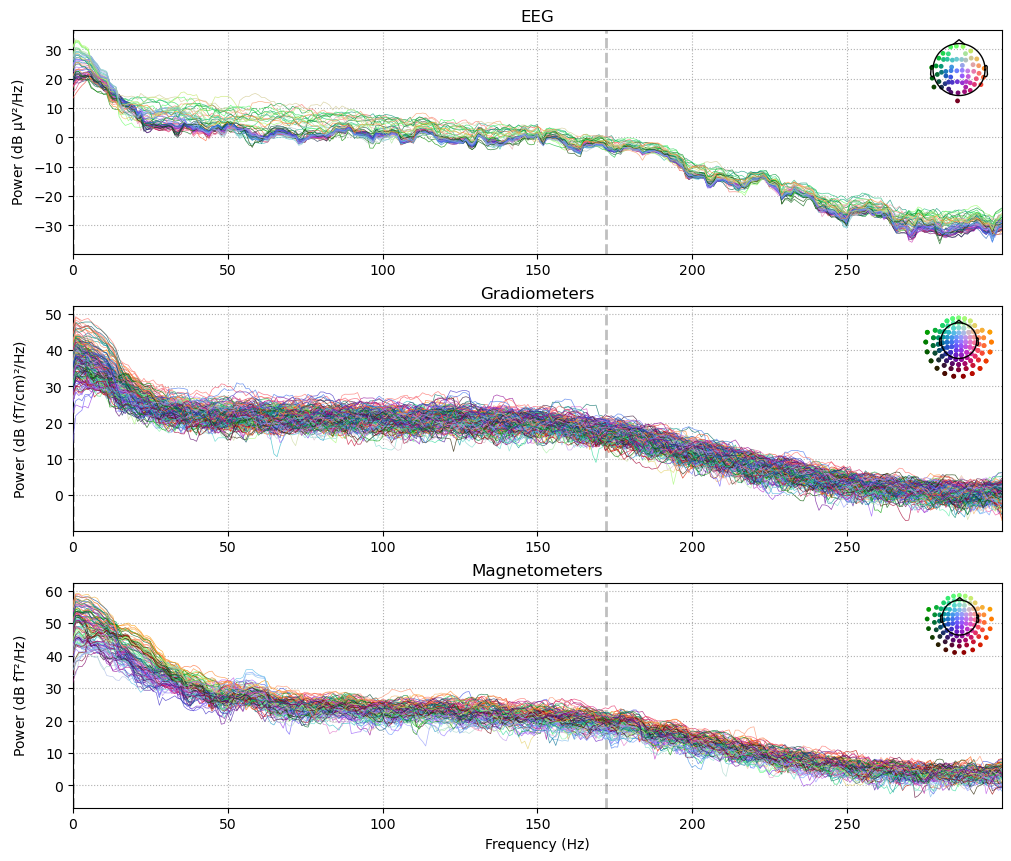

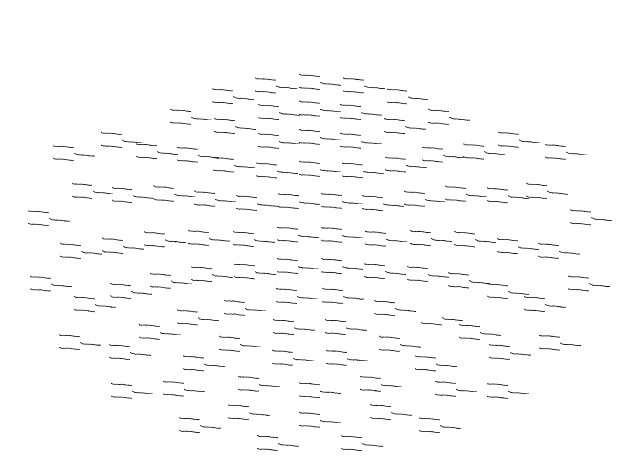

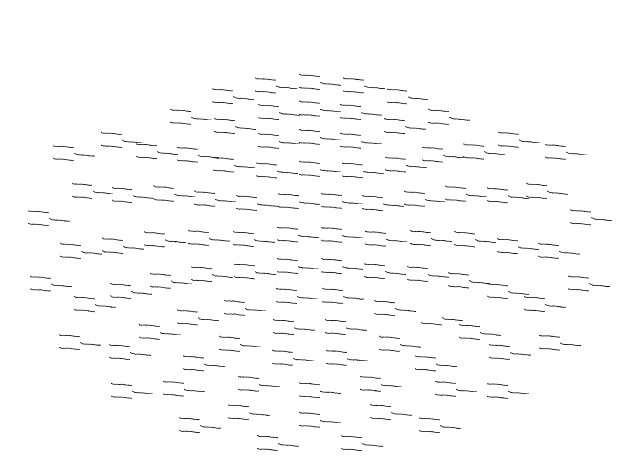

In [21]:
evk_spectrum.plot(picks="data", exclude="bads", amplitude=False)
evk_spectrum.plot_topo(color="k", fig_facecolor="w", axis_facecolor="w")

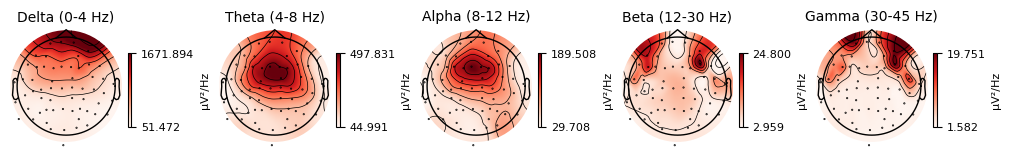

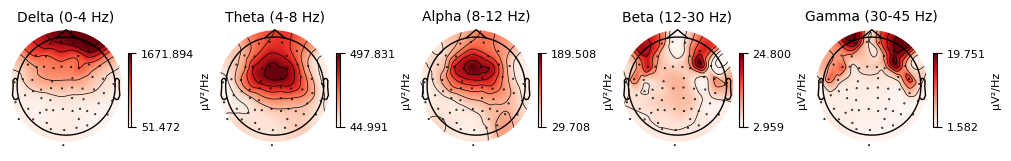

In [22]:
evk_spectrum.plot_topomap(ch_type="eeg", agg_fun=np.median)

## レガシーコードの移行

以下は、`mne.time_frequency.Spectrum`クラスと`mne.time_frequency.EpochsSpectrum`クラスの導入前と導入後の同等コードのクイックリファレンス表です。

表：一般的なスペクトラム・クラスアクションのクイック・リファレンス
|Old|New|
|-----|-----|
|``mne.time_frequency.psd_welch(raw)``|``raw.compute_psd().get_data(return_freqs=True)``|
|``mne.time_frequency.psd_multitaper(raw)``|``raw.compute_psd(method='multitaper').get_data(return_freqs=True)``|
|``raw.plot_psd(fmin, fmax, dB, area_mode='std')``|``raw.compute_psd(fmin, fmax).plot(dB, ci='std')``|
|``raw.plot_psd_topo(n_fft, overlap, axes)``|``raw.compute_psd(n_fft, overlap).plot_topo(axes)``|
|``epochs.plot_psd_topomap(tmax, bands)``|``epochs.compute_psd(tmax).plot_topomap(bands)``|



<div class="alert alert-danger"><h4>Warning</h4><p>The functions ``mne.time_frequency.psd_welch`` and
   以下の旧来の描画メソッドは、後方互換性のために残されていますが、新しいコードでは使用を避けるべきです：`Raw.plot_psd()<mne.io.Raw.plot_psd>`,`Epochs.plot_psd()<mne.Epochs.plot_psd>`,`Raw.plot_psd_topo()<mne.io.Raw.plot_psd_topo>`, and
   `Epochs.plot_psd_topomap()<mne.Epochs.plot_psd_topomap>` これらは今後廃止される可能性もあり、今後の開発では`compute_psd().plot()` や `compute_psd().plot_topomap()` など、`compute_psd()` を起点とするオブジェクト指向APIを使うことが推奨されます。</p></div>

